**Workshop 4, Enrique Santos Fraire**

In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.4 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


# 5 The OLS method

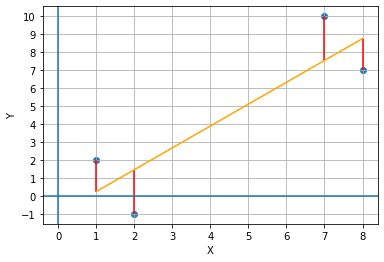

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
data = {'x':  [1,2,7,8],
        'y': [2,-1,10,7]}
df = pd.DataFrame(data)
b1,b0 = np.polyfit(df.x,df.y,1)
df['yhat'] = b0 + b1*df['x']
#plt.clf()
plt.scatter(df.x,df.y)
plt.plot(df.x, df.yhat,c="orange")
plt.xticks(np.arange(-4,14,1))
plt.yticks(np.arange(-2,11,1))

for i in range(4):
  x=df.x.iloc[i]
  ymin= df.y.iloc[i]
  ymax=df.yhat.iloc[i]
  if (ymin>ymax):
    temp=ymax
    ymax=ymin
    ymin=temp
  plt.vlines(x=x,ymin=ymin,ymax=ymax,color='r')

plt.axhline(y=0)
plt.axvline(x=0)

plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

# 6 CHALLENGE: Estimate a market regression model

Calculate cc returns of both stocks and drop NA values

In [3]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Getting price data and selecting adjusted price columns:
sprices = pdr.get_data_yahoo(['ALFAA.MX','^MXX'],start="01/01/2018", end="07/31/2022",interval="m")
sprices = sprices['Adj Close']

# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()
sr.columns=['ALFAAret','MXXret']

Do a scatter plot including the regression line and interpret the plot

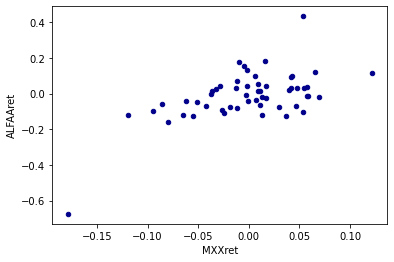

In [4]:
sr.plot.scatter(x='MXXret', y='ALFAAret',c='DarkBlue')
plt.show()

LOS DATOS MANTIENEN UN RELACIÓN POSITIVA, ALFAA PARECE TENER UN INCREMENTO DEL DOBLE DE MXXRET.

Scatter plots can be misleading when ranges of X and Y are very different. In this case, Alfa had a very bad month in the COVID crisis with more than 60% decline!

Then, we can re-do the scatter plot trying to make the X and Y axis using the same range of values

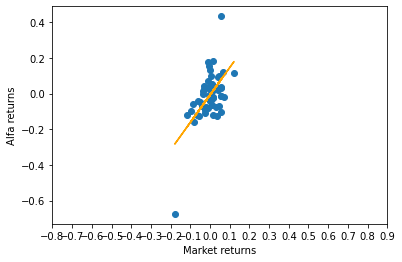

In [5]:
plt.clf()
x=sr['MXXret']
y = sr['ALFAAret']
plt.scatter(x, y)
# Now I add the regression line:
# The polyfit function actually calculates the beta0 and beta1 of the linear regression line:
b1,b0 = np.polyfit(x,y,1)
# With the beta coefficients I calculated the predicted line (yfit)
yfit = b0+b1*x
plt.plot(x, yfit,c="orange")
# I change the range for X trying to make both axis moving in the same range:
plt.xticks(np.arange(-0.80,1,0.1))
# I label the axis:
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


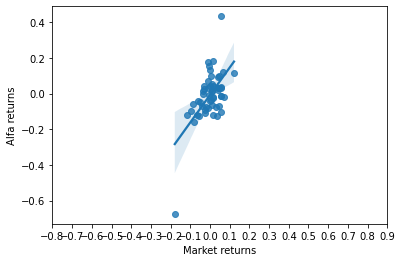

In [6]:
# Another faster way to plot a scatter and the regression line:
# I use the seaborn library:
import seaborn as sns
plt.clf()
sns.regplot(x, y)
plt.xticks(np.arange(-0.80,1,0.1))
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

Run the market regression model (the Y=stock return, the X=market return). You can use the function OLS from the statsmodels.api library.

In [7]:
import statsmodels.api as sm
# I add a column of 1's to the X dataframe in order to include the beta0 coefficient (intercept) in the model:
X = sm.add_constant(x)
# I estimate the OLS regression model:
mkmodel = sm.OLS(y,X).fit()
# I display the summary of the regression: 
print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:               ALFAAret   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     28.13
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           2.36e-06
Time:                        15:04:38   Log-Likelihood:                 42.633
No. Observations:                  54   AIC:                            -81.27
Df Residuals:                      52   BIC:                            -77.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0080      0.015     -0.522      0.6

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [8]:
# I can also run the OLS regression using the ols function 
import statsmodels.formula.api as smf

mkmodel2 = smf.ols('ALFAAret ~ MXXret',data=sr).fit()
# This function does not require to add the column of 1's to include the intercept!
print(mkmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:               ALFAAret   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     28.13
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           2.36e-06
Time:                        15:04:39   Log-Likelihood:                 42.633
No. Observations:                  54   AIC:                            -81.27
Df Residuals:                      52   BIC:                            -77.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0080      0.015     -0.522      0.6

In [9]:
# Using matrix algebra to estimate the beta coefficients:
# I add the column of 1's to the dataframe:
sr['constant'] = 1
selcols = ['constant','MXXret']
# I set x as a matrix with the column of 1's and the values of X:
x = sr[selcols].values
# I set y as the dependent variable:
y = sr['ALFAAret'].values
# I calculate the matrix multiplication X'X:
xtx = np.matmul(x.transpose(),x)
# I calculate the matrix multiplication X'Y:
xty = np.matmul(x.transpose(),y)
# I get the inverse of the matrix (X'X) to solve for the beta coefficients:
invtxt = np.linalg.inv(xtx)
# I multiply inv(X'X)*X'Y to get the estimation of the beta vector (beta0 and beta1 coefficients) 
betas = np.matmul(invtxt,xty)
betas

array([-0.00795217,  1.53870365])

The regression equation is: E[ALFAret]= -0.0075056132861929395 + 1.5273762316983732*MXXret.

# 8 CHALLENGE: Estimate moving betas for the market regression model

Download monthly stock prices for ALFAA.MX and the market (^MXX) from Jan 2010 to Jul 2022, and calculate cc returns.

In [10]:
# Getting price data and selecting adjusted price columns:
sprices = pdr.get_data_yahoo(['ALFAA.MX','^MXX'],start="01/01/2010", end="07/31/2022",interval="m")
sprices = sprices['Adj Close']

# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()
sr.columns=['ALFAAret','MXXret']

Run rolling regressions and save the moving and coefficients for all time windows.

In [11]:
from statsmodels.regression.rolling import RollingOLS
x=sm.add_constant(sr['MXXret'])
y = sr['ALFAAret']
rolreg = RollingOLS(y,x,window=36).fit()
betas = rolreg.params
# I check the last pairs of beta values:
betas.tail()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,MXXret
Date,,
2022-03-01,-0.022426,1.877835
2022-04-01,-0.016308,1.803981
2022-05-01,-0.014117,1.816946
2022-06-01,-0.012129,1.720952
2022-07-01,-0.012282,1.706227


Do a plot to see how b1 and b0 has changed over time.

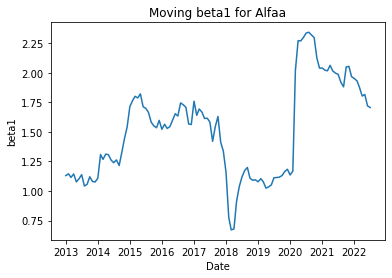

In [12]:
plt.clf()
plt.plot(betas['MXXret'])
plt.title('Moving beta1 for Alfaa')
plt.xlabel('Date')
plt.ylabel('beta1')
plt.show()

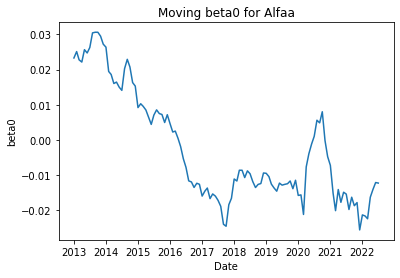

In [13]:
plt.clf()
plt.plot(betas['const'])
plt.title('Moving beta0 for Alfaa')
plt.xlabel('Date')
plt.ylabel('beta0')
plt.show()

We can actually calculate the mean and standard deviation of all these pairs of moving beta coefficients and see how they compare with their beta coefficients and their standard errors of the original regression when we use only 1 sample with the last 36 months:

In [14]:
betas.describe()

,const,MXXret
count,115.000000,115.000000
mean,-0.002615,1.513427
std,0.015600,0.402208
min,-0.025598,0.671151
25%,-0.014346,1.133487
50%,-0.009506,1.546795
75%,0.008243,1.794689
max,0.030594,2.343574
